In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris()

In [4]:
dir(iris_dataset)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [5]:
iris_dataset.DESCR.splitlines()

['Iris Plants Database',
 '====================',
 '',
 'Notes',
 '-----',
 'Data Set Characteristics:',
 '    :Number of Instances: 150 (50 in each of three classes)',
 '    :Number of Attributes: 4 numeric, predictive attributes and the class',
 '    :Attribute Information:',
 '        - sepal length in cm',
 '        - sepal width in cm',
 '        - petal length in cm',
 '        - petal width in cm',
 '        - class:',
 '                - Iris-Setosa',
 '                - Iris-Versicolour',
 '                - Iris-Virginica',
 '    :Summary Statistics:',
 '',
 '    ============== ==== ==== ======= ===== ====================',
 '                    Min  Max   Mean    SD   Class Correlation',
 '    ============== ==== ==== ======= ===== ====================',
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826',
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194',
 '    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)',
 '    petal width:    0.1  2.5   1.20  0.76 

In [6]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

In [9]:
df.shape

(150, 4)

In [10]:
df['target'] = iris_dataset.target

In [11]:
df.shape

(150, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [13]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
import seaborn as sns

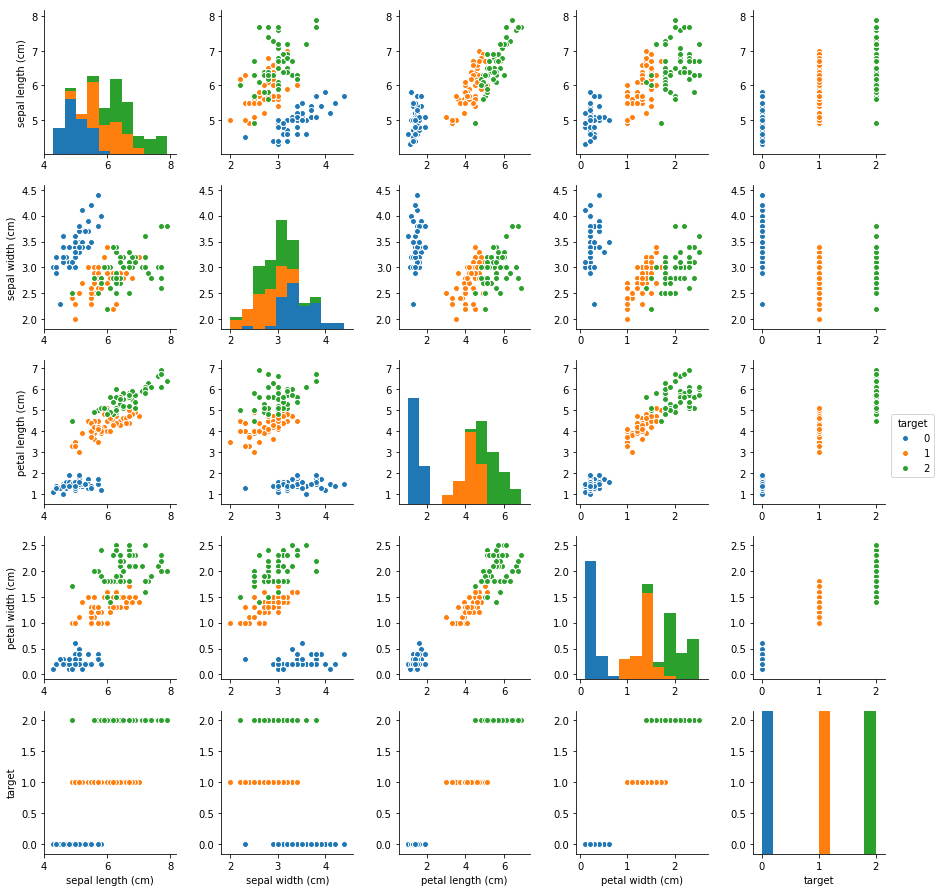

In [16]:
sns.pairplot(df, hue='target')

In [17]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

Text(0,0.5,'Sepal Width')

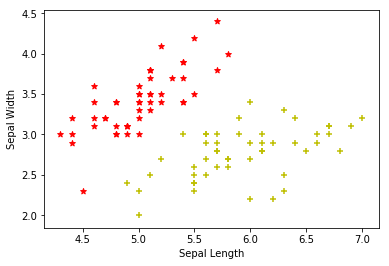

In [19]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='r', marker='*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='y', marker='+')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0,0.5,'petal Width')

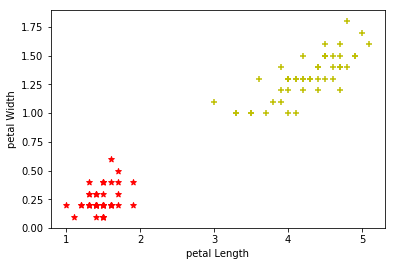

In [20]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='r', marker='*')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='y', marker='+')
plt.xlabel('petal Length')
plt.ylabel('petal Width')

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [25]:
knn.score(X_train, y_train)

0.9833333333333333

In [26]:
knn.score(X_test, y_test)

1.0

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn.predict(X_test))
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(33,0.5,'Actual')

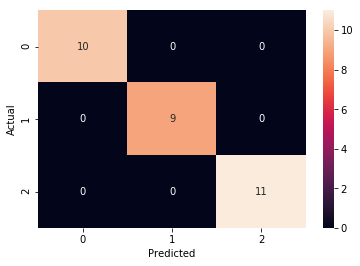

In [29]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30

